https://stepik.org/lesson/1370116/step/7

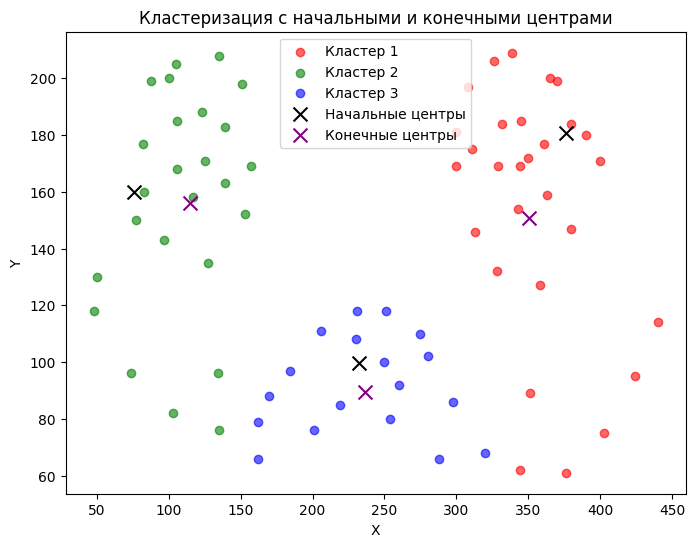

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = [[(365, 200), (390, 180), (350, 172), (400, 171)], [(77, 150), (100, 200), (50, 130)], [(250, 100), (170, 88), (280, 102), (230, 108)]]
data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

K = 3                                           # число кластеров

ro = lambda x, m: np.mean((x - m)**2)

ma_start = [np.mean(xx, axis=0) for xx in T]    # начальные центры кластеров
ma = ma_start * 1

for _ in range(10):
    X = [[] for _ in range(K)]                  # инициализация пустого двумерного списка для хранения объектов кластеров

    for x_vect in data_x:
        r = [ro(x_vect, m) for m in ma]         # вычисление расстояний для текущего образа до центров кластеров
        X[np.argmin(r)].append(x_vect)          # добавление образа к кластеру с ближайшим центром

    ma = [np.mean(xx, axis=0) for xx in X]

for i in range(K):
    X[i] = T[i] + X[i]

# Визуализация
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))

for i, xx in enumerate(X):
    xx = np.array(xx)
    if len(xx) > 0:
        plt.scatter(xx[:, 0], xx[:, 1], c=colors[i], label=f'Кластер {i+1}', alpha=0.6)



# Отображение стартовых и финальных центров
ma = np.array(ma)
ma_start = np.array(ma_start)
plt.scatter(ma_start[:, 0], ma_start[:, 1], c='black', marker='x', s=100, label='Начальные центры')
plt.scatter(ma[:, 0], ma[:, 1], c='purple', marker='x', s=100, label='Конечные центры')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Кластеризация с начальными и конечными центрами')
plt.show()